In [1]:
using PyPlot

# Experiment 1: Test $\ell_1$ Penalty

## Load Data

In [2]:
m,n = 20480, 202;  # size of matrix
mp, np = 128,160;   # size of one image

(128,160)

In [3]:
fid = open("results/R.bin","r")
R   = read(fid,Float64,m*n)
close(fid)
sort!(R);

## Maximum Likelihood
* Penalty: $\rho(R;\alpha) = \alpha \|R\|_1$
* Density: $p(r;\alpha) = \exp[-\alpha|r|]/n_c(\alpha)$
* Normalization constant: $n_c(\alpha) = 2/\alpha$
* Maximum likelihood:
$$\min_\alpha \frac{\alpha}{mn}\|R\|_1 + \log\left(\frac{2}{\alpha}\right)\quad\Rightarrow\quad\alpha = \frac{mn}{\|R\|_1}$$

In [4]:
α = m*n/sum(abs(R))

33.72641401899046

## Plot Result
* Empirical Distribution
* $\ell_1$ Distribution

In [5]:
function eCDF(x::Array{Float64,1},R::Array{Float64,1})
    sort!(x)
    n = length(x)
    m = length(R)
    v = zeros(n)
    j = 1
    for i = 1:n
        while j ≤ m && R[j] < x[i]
            j += 1
        end
        v[i] = (j-1)/m
    end
    return v
end

function l1CDF(x::Array{Float64,1},α::Float64)
    n = length(x)
    v = zeros(n)
    for i = 1:n
        v[i] = ifelse(x[i] ≤ 0.0,0.5*exp(x[i]*α),1.0 - 0.5*exp(-x[i]*α))
    end
    return v
end

l1CDF (generic function with 1 method)

In [6]:
x = collect(linspace(-0.5,0.5,100));
v1 = eCDF(x,R);
v2 = l1CDF(x,α);

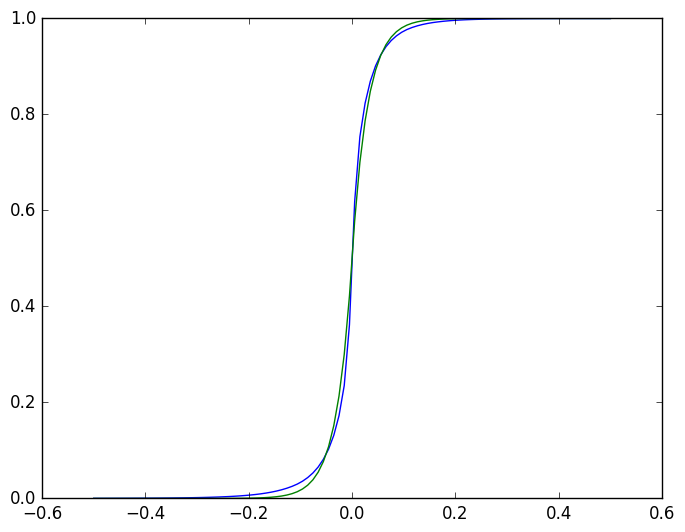

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ad5ca10>

In [7]:
plot(x,v1,"b")
plot(x,v2,"g")

## What About $\ell_2$?
* Penalty: $\rho(R;\beta) = \beta^2\|R\|_F^2/2$
* Density: $p(r;\beta) = \exp[-\rho(r;\beta)]/n_c(\beta)$
* Normalization constant: $n_c(\beta) = \sqrt{2\pi}/\beta$
* Maximum likelihood:
$$\min_\beta \frac{\beta^2}{2mn}\|R\|_F^2 + \log\left(\frac{\sqrt{2\pi}}{\beta}\right)\quad\Rightarrow\quad\beta = \frac{\sqrt{mn}}{\|R\|_F}$$

In [8]:
β = sqrt(m*n)/vecnorm(R)

19.184107560360314

In [9]:
function l2CDF(x::Array{Float64,1},β::Float64)
    sort!(x);
    n = length(x);
    v = zeros(n);
    for i = 1:n
        v[i] = 0.5*(1.0+erf(x[i]*β/sqrt(2)));
    end
    return v
end

l2CDF (generic function with 1 method)

In [10]:
v3 = l2CDF(x,β);

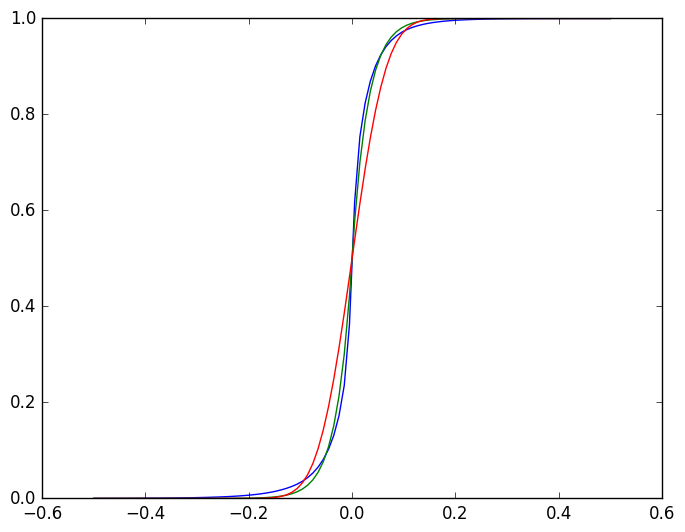

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ad8f350>

In [11]:
plot(x,v1,"b")
plot(x,v2,"g")
plot(x,v3,"r")